In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
# set plot size to fill the width of the page
plt.rcParams["figure.figsize"] = (10, 5)
import copy

# Model definition

In [3]:
# simple multi_layer perceptron with relu nonlinearity with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = nn.Linear(self.hidden_size, self.output_size)
        self.relu1 = nn.PReLU(num_parameters=1, init=0.1)
        self.relu2 = nn.PReLU(num_parameters=1, init=0.1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)            
        return x

In [4]:
model = Net(1, 500, 1)

In [5]:
model

Net(
  (fc1): Linear(in_features=1, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu1): PReLU(num_parameters=1)
  (relu2): PReLU(num_parameters=1)
)

In [6]:
def validation_loss(x, y, model):
    y_pred = model(x)
    loss = F.mse_loss(y_pred, y)
    return loss

# Sample dataset

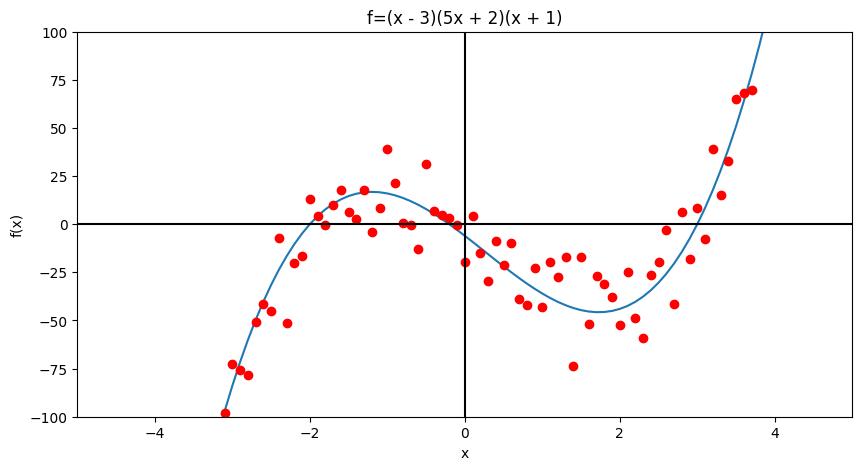

In [7]:
# plot function f=(x - 3)*(x + 2)*(x + 1)
x = np.arange(-5, 5, 0.1)
noise = np.random.normal(0, 15, x.shape)
y = (x - 3)*(x + 2)*(5*x + 1)
plt.plot(x, y)
plt.plot(x, y + noise, 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f=(x - 3)(5x + 2)(x + 1)')
plt.show()

In [8]:
model_no_reg = copy.deepcopy(model)

In [9]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_no_reg.parameters(), lr=0.01)
wd = 0.000

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_no_reg(X)
    # compute loss
    loss = criterion(y_pred, Y) + (torch.norm(model_no_reg.fc1.weight, 1) + torch.norm(model_no_reg.fc2.weight, 1) + torch.norm(model_no_reg.fc3.weight, 1)) * wd
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))

torch.Size([100, 1])


  0%|          | 36/30000 [00:00<01:23, 358.74it/s]

epoch 0, loss 28951.205078125


  4%|▎         | 1065/30000 [00:02<00:54, 527.40it/s]

epoch 1000, loss 169.25872802734375


  7%|▋         | 2065/30000 [00:03<00:50, 550.68it/s]

epoch 2000, loss 177.7686767578125


 10%|█         | 3071/30000 [00:05<00:49, 549.25it/s]

epoch 3000, loss 165.77540588378906


 14%|█▎        | 4079/30000 [00:07<00:47, 550.98it/s]

epoch 4000, loss 153.7425079345703


 17%|█▋        | 5086/30000 [00:09<00:45, 543.61it/s]

epoch 5000, loss 144.63827514648438


 20%|██        | 6093/30000 [00:11<00:43, 549.38it/s]

epoch 6000, loss 134.39883422851562


 24%|██▎       | 7100/30000 [00:12<00:41, 547.09it/s]

epoch 7000, loss 125.76913452148438


 27%|██▋       | 8089/30000 [00:14<00:40, 540.88it/s]

epoch 8000, loss 126.15829467773438


 30%|███       | 9099/30000 [00:16<00:38, 549.89it/s]

epoch 9000, loss 128.6065216064453


 34%|███▎      | 10109/30000 [00:18<00:35, 552.73it/s]

epoch 10000, loss 132.8618621826172


 37%|███▋      | 11064/30000 [00:20<00:34, 554.37it/s]

epoch 11000, loss 119.54841613769531


 40%|████      | 12075/30000 [00:22<00:32, 553.36it/s]

epoch 12000, loss 115.50588989257812


 44%|████▎     | 13081/30000 [00:23<00:30, 549.50it/s]

epoch 13000, loss 104.67395782470703


 47%|████▋     | 14089/30000 [00:25<00:28, 550.97it/s]

epoch 14000, loss 102.85459899902344


 50%|█████     | 15097/30000 [00:27<00:27, 548.88it/s]

epoch 15000, loss 97.63267517089844


 54%|█████▎    | 16104/30000 [00:29<00:25, 551.85it/s]

epoch 16000, loss 100.21856689453125


 57%|█████▋    | 17056/30000 [00:31<00:23, 549.42it/s]

epoch 17000, loss 92.65137481689453


 60%|██████    | 18065/30000 [00:32<00:21, 551.09it/s]

epoch 18000, loss 84.92990112304688


 64%|██████▎   | 19071/30000 [00:34<00:19, 550.90it/s]

epoch 19000, loss 87.840576171875


 67%|██████▋   | 20079/30000 [00:36<00:17, 553.37it/s]

epoch 20000, loss 80.00318145751953


 70%|███████   | 21081/30000 [00:38<00:16, 529.19it/s]

epoch 21000, loss 80.08491516113281


 74%|███████▎  | 22098/30000 [00:40<00:14, 533.95it/s]

epoch 22000, loss 76.17892456054688


 77%|███████▋  | 23074/30000 [00:42<00:12, 542.72it/s]

epoch 23000, loss 77.62195587158203


 80%|████████  | 24078/30000 [00:43<00:10, 547.52it/s]

epoch 24000, loss 78.95423126220703


 84%|████████▎ | 25086/30000 [00:45<00:08, 553.97it/s]

epoch 25000, loss 65.51464080810547


 87%|████████▋ | 26095/30000 [00:47<00:07, 552.94it/s]

epoch 26000, loss 58.26784133911133


 90%|█████████ | 27101/30000 [00:49<00:05, 552.63it/s]

epoch 27000, loss 54.2597770690918


 94%|█████████▎| 28110/30000 [00:51<00:03, 553.08it/s]

epoch 28000, loss 54.09184646606445


 97%|█████████▋| 29060/30000 [00:52<00:01, 538.95it/s]

epoch 29000, loss 50.078125


100%|██████████| 30000/30000 [00:54<00:00, 548.89it/s]


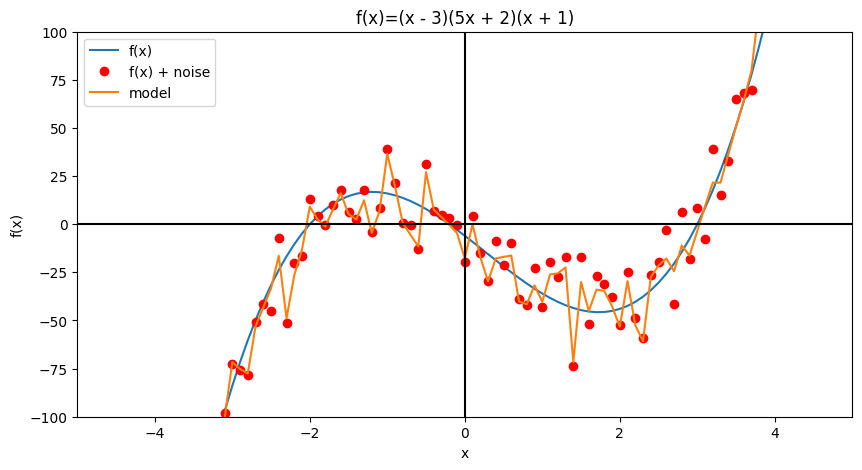

In [10]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x, y + noise, 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [11]:
model_with_wd = Net(1, 500, 1)

In [12]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_wd.parameters(), lr=0.01)
wd = 0.1

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_with_wd(X)
    # compute loss
    loss = criterion(y_pred, Y) + (torch.norm(model_with_wd.fc1.weight, 1) + torch.norm(model_with_wd.fc2.weight, 1) + torch.norm(model_with_wd.fc3.weight, 1)) * wd
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))
        

torch.Size([100, 1])


  0%|          | 52/30000 [00:00<00:58, 510.67it/s]

epoch 0, loss 29575.462890625


  4%|▎         | 1058/30000 [00:01<00:52, 551.78it/s]

epoch 1000, loss 380.67657470703125


  7%|▋         | 2061/30000 [00:03<00:50, 548.12it/s]

epoch 2000, loss 292.53546142578125


 10%|█         | 3070/30000 [00:05<00:48, 551.82it/s]

epoch 3000, loss 265.0745544433594


 14%|█▎        | 4078/30000 [00:07<00:47, 549.16it/s]

epoch 4000, loss 250.20730590820312


 17%|█▋        | 5084/30000 [00:09<00:44, 553.93it/s]

epoch 5000, loss 244.66571044921875


 20%|██        | 6093/30000 [00:11<00:43, 553.62it/s]

epoch 6000, loss 232.9969024658203


 24%|██▎       | 7103/30000 [00:12<00:41, 545.85it/s]

epoch 7000, loss 233.02932739257812


 27%|██▋       | 8110/30000 [00:14<00:39, 553.04it/s]

epoch 8000, loss 224.43328857421875


 30%|███       | 9062/30000 [00:16<00:38, 550.91it/s]

epoch 9000, loss 221.1884307861328


 34%|███▎      | 10070/30000 [00:18<00:36, 548.36it/s]

epoch 10000, loss 220.6888427734375


 37%|███▋      | 11071/30000 [00:20<00:35, 535.76it/s]

epoch 11000, loss 221.20404052734375


 40%|████      | 12069/30000 [00:21<00:32, 545.20it/s]

epoch 12000, loss 215.4248504638672


 44%|████▎     | 13067/30000 [00:23<00:31, 540.39it/s]

epoch 13000, loss 214.77288818359375


 47%|████▋     | 14067/30000 [00:25<00:29, 546.72it/s]

epoch 14000, loss 213.98031616210938


 50%|█████     | 15060/30000 [00:27<00:27, 543.81it/s]

epoch 15000, loss 215.2253875732422


 54%|█████▎    | 16110/30000 [00:29<00:25, 548.68it/s]

epoch 16000, loss 212.6478271484375


 57%|█████▋    | 17061/30000 [00:31<00:23, 549.87it/s]

epoch 17000, loss 212.59765625


 60%|██████    | 18068/30000 [00:32<00:21, 551.61it/s]

epoch 18000, loss 209.98037719726562


 64%|██████▎   | 19069/30000 [00:34<00:19, 547.18it/s]

epoch 19000, loss 208.54122924804688


 67%|██████▋   | 20069/30000 [00:36<00:18, 542.58it/s]

epoch 20000, loss 212.7086181640625


 70%|███████   | 21060/30000 [00:38<00:16, 541.48it/s]

epoch 21000, loss 205.8384552001953


 74%|███████▎  | 22107/30000 [00:40<00:14, 542.11it/s]

epoch 22000, loss 204.3609619140625


 77%|███████▋  | 23097/30000 [00:42<00:12, 542.41it/s]

epoch 23000, loss 215.0590362548828


 80%|████████  | 24096/30000 [00:43<00:10, 543.41it/s]

epoch 24000, loss 211.71897888183594


 84%|████████▎ | 25089/30000 [00:45<00:09, 541.68it/s]

epoch 25000, loss 209.9199981689453


 87%|████████▋ | 26072/30000 [00:47<00:07, 529.04it/s]

epoch 26000, loss 204.2813262939453


 90%|█████████ | 27067/30000 [00:49<00:05, 544.48it/s]

epoch 27000, loss 202.69467163085938


 94%|█████████▎| 28085/30000 [00:51<00:03, 524.28it/s]

epoch 28000, loss 199.61770629882812


 97%|█████████▋| 29066/30000 [00:53<00:01, 539.70it/s]

epoch 29000, loss 189.49066162109375


100%|██████████| 30000/30000 [00:54<00:00, 545.64it/s]


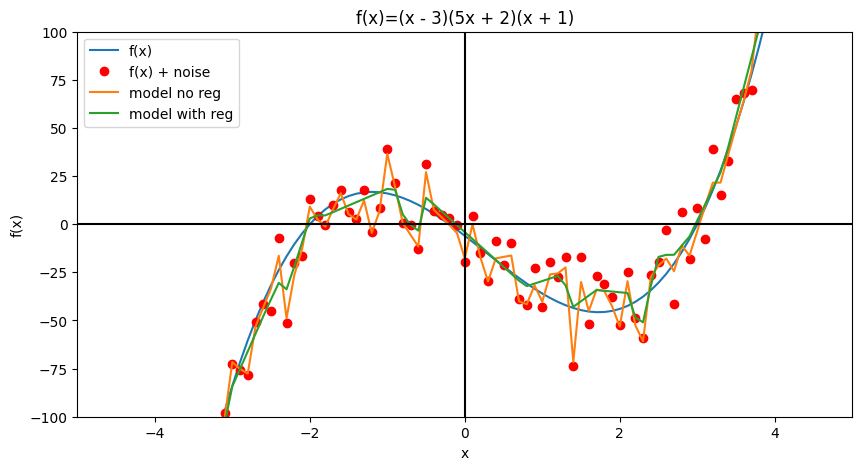

In [13]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x, y + noise, 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model no reg')
plt.plot(x, model_with_wd(X).detach().numpy(), label='model with reg')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [14]:
model_with_LC = Net(1, 500, 1)

In [15]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_LC.parameters(), lr=0.01)
lc2 = 500
lc1 = 50

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_with_LC(X)
    # compute loss
    # get prelu slope
    slope1 = model_with_LC.relu1.weight
    slope2 = model_with_LC.relu2.weight
    loss = criterion(y_pred, Y) + lc2 * (slope2 - 1)**2 + lc1 * (slope1 - 1)**2
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))

torch.Size([100, 1])


  0%|          | 54/30000 [00:00<00:56, 533.31it/s]

epoch 0, loss 29291.099609375


  4%|▎         | 1086/30000 [00:01<00:51, 566.03it/s]

epoch 1000, loss 320.73834228515625


  7%|▋         | 2061/30000 [00:03<00:49, 560.42it/s]

epoch 2000, loss 246.09349060058594


 10%|█         | 3099/30000 [00:05<00:47, 562.68it/s]

epoch 3000, loss 220.77947998046875


 14%|█▎        | 4069/30000 [00:07<00:46, 559.67it/s]

epoch 4000, loss 208.4008026123047


 17%|█▋        | 5090/30000 [00:09<00:45, 547.63it/s]

epoch 5000, loss 203.07521057128906


 20%|██        | 6113/30000 [00:10<00:42, 559.30it/s]

epoch 6000, loss 200.73452758789062


 24%|██▎       | 7094/30000 [00:12<00:40, 566.40it/s]

epoch 7000, loss 198.66082763671875


 27%|██▋       | 8074/30000 [00:14<00:38, 565.07it/s]

epoch 8000, loss 198.72198486328125


 30%|███       | 9076/30000 [00:16<00:37, 562.57it/s]

epoch 9000, loss 197.1202392578125


 34%|███▎      | 10061/30000 [00:17<00:35, 567.56it/s]

epoch 10000, loss 197.17916870117188


 37%|███▋      | 11105/30000 [00:19<00:33, 570.38it/s]

epoch 11000, loss 196.8519744873047


 40%|████      | 12091/30000 [00:21<00:31, 571.47it/s]

epoch 12000, loss 195.05160522460938


 44%|████▎     | 13071/30000 [00:23<00:29, 565.30it/s]

epoch 13000, loss 225.43496704101562


 47%|████▋     | 14107/30000 [00:24<00:28, 553.51it/s]

epoch 14000, loss 198.8869171142578


 50%|█████     | 15087/30000 [00:26<00:26, 566.17it/s]

epoch 15000, loss 197.4405517578125


 54%|█████▎    | 16060/30000 [00:28<00:24, 563.70it/s]

epoch 16000, loss 203.40684509277344


 57%|█████▋    | 17092/30000 [00:30<00:22, 565.37it/s]

epoch 17000, loss 307.8354797363281


 60%|██████    | 18078/30000 [00:31<00:20, 569.53it/s]

epoch 18000, loss 190.01414489746094


 64%|██████▎   | 19063/30000 [00:33<00:19, 559.92it/s]

epoch 19000, loss 188.12643432617188


 67%|██████▋   | 20089/30000 [00:35<00:17, 563.84it/s]

epoch 20000, loss 187.01113891601562


 70%|███████   | 21072/30000 [00:37<00:15, 569.74it/s]

epoch 21000, loss 245.91632080078125


 74%|███████▎  | 22058/30000 [00:38<00:13, 568.31it/s]

epoch 22000, loss 185.64328002929688


 77%|███████▋  | 23101/30000 [00:40<00:12, 570.31it/s]

epoch 23000, loss 185.23770141601562


 80%|████████  | 24086/30000 [00:42<00:10, 564.80it/s]

epoch 24000, loss 199.24368286132812


 84%|████████▎ | 25068/30000 [00:44<00:08, 568.42it/s]

epoch 25000, loss 191.86907958984375


 87%|████████▋ | 26102/30000 [00:46<00:06, 561.03it/s]

epoch 26000, loss 190.3422393798828


 90%|█████████ | 27088/30000 [00:47<00:05, 568.15it/s]

epoch 27000, loss 191.2115936279297


 94%|█████████▎| 28072/30000 [00:49<00:03, 569.47it/s]

epoch 28000, loss 190.10484313964844


 97%|█████████▋| 29114/30000 [00:51<00:01, 569.45it/s]

epoch 29000, loss 193.6097412109375


100%|██████████| 30000/30000 [00:52<00:00, 566.87it/s]


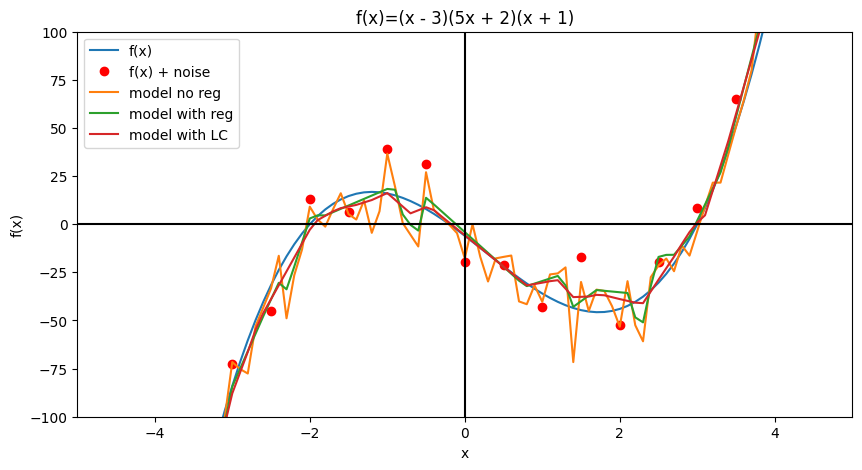

In [16]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x[::5], y[::5] + noise[::5], 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model no reg')
plt.plot(x, model_with_wd(X).detach().numpy(), label='model with reg')
plt.plot(x, model_with_LC(X).detach().numpy(), label='model with LC')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [17]:
Y_validation = torch.from_numpy(y.reshape(-1,1)).float()
print("validation loss for model with no regularization: ", validation_loss(X, Y_validation, model_no_reg).item())
print("validation loss for model with weight decay: ", validation_loss(X, Y_validation, model_with_wd).item())
print("validation loss for model with LC: ", validation_loss(X, Y_validation, model_with_LC).item())

validation loss for model with no regularization:  121.3505859375
validation loss for model with weight decay:  52.87892150878906
validation loss for model with LC:  32.11252975463867


In [18]:
slope1 = model_with_LC.relu1.weight
slope2 = model_with_LC.relu2.weight
print(slope1)
print(slope2)

Parameter containing:
tensor([0.2933], requires_grad=True)
Parameter containing:
tensor([1.0011], requires_grad=True)


In [19]:
print(np.max(model_with_LC.fc1.weight.detach().numpy()))
print(np.min(model_with_LC.fc1.weight.detach().numpy()))

print(np.max(model_with_LC.fc2.weight.detach().numpy()))
print(np.min(model_with_LC.fc2.weight.detach().numpy()))

print(np.max(model_with_LC.fc3.weight.detach().numpy()))
print(np.min(model_with_LC.fc3.weight.detach().numpy()))

0.97443205
-1.0735258
3.6707857
-4.12943
0.35842663
-0.2774716


In [20]:
print(np.max(model_with_wd.fc1.weight.detach().numpy()))
print(np.min(model_with_wd.fc1.weight.detach().numpy()))

print(np.max(model_with_wd.fc2.weight.detach().numpy()))
print(np.min(model_with_wd.fc2.weight.detach().numpy()))

print(np.max(model_with_wd.fc3.weight.detach().numpy()))
print(np.min(model_with_wd.fc3.weight.detach().numpy()))

2.0032206
-2.2981713
3.6141527
-2.7582328
6.6362267
-6.462727


In [21]:
print(np.max(model_no_reg.fc1.weight.detach().numpy()))
print(np.min(model_no_reg.fc1.weight.detach().numpy()))

print(np.max(model_no_reg.fc2.weight.detach().numpy()))
print(np.min(model_no_reg.fc2.weight.detach().numpy()))

print(np.max(model_no_reg.fc3.weight.detach().numpy()))
print(np.min(model_no_reg.fc3.weight.detach().numpy()))

1.623078
-1.7544196
8.125253
-7.7681136
4.394166
-5.1021657
